<a href="https://colab.research.google.com/github/DiegoSamanezDenis/Rocketship-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing the Effectiveness of Varying Methods of Fuel Consumption Within the X-15 Rocket During Flight Based on Air Resistance

By: Diego Samanez Denis, Lucas Woo

**Introduction - Problem definition**

Space exploration has always fascinated us. Consequently, the ability of a man-made object to transcend the limits of our imagination brings along many interesting questions. One such question is: How can fuel be efficiently expelled during flight to maximize altitude while considering air resistance? In this project, we looked specifically at the X-15 rocket, a supersonic winged aircraft reaching speeds of up to 6 times the speed of sound, to determine whether it was more beneficial to expend more fuel at the beginning, middle or end of flight. The National Aeronautics and Space Administration provides several important characteristics and specifications of the X-15 rocket. During its launch, the X-15 had a predetermined launch time of 80 seconds. This duration is critical for achieving the necessary velocity in order to break free from the gravitational pull and ascend into higher altitudes. Another important parameter of the X-15 is its specific impulse. Specific impulse is a measure of how effectively a rocket engine utilizes its propellent. The specific impulse of the X-15 was recorded as 140 seconds, indicating the duration for which the rocket engine could produce a unit of thrust from a unit of propellent mass. The exhaust velocity of the X-15 rocket can be derived from its specific impulse and the acceleration due to gravity on Earth. By multiplying the specific impulse (140 seconds) with the gravitational acceleration (9.8 m/s^2), the exhaust velocity of the X-15 was calculated to be 1372 m/s. This value represents the speed at which the expelled gases leave the rocket's engine nozzle, contributing to its propulsion. At the time of launch, the X-15 had a total weight of 15 420 kg, including the mass of the fuel. This weight encompassed the entire rocket system, including the propellant and the rocket itself.  

https://www.nasa.gov/centers/armstrong/news/FactSheets/FS-052-DFRC.html

https://www.si.edu/object/north-american-x-15%3Anasm_A19690360000

https://www.nasa.gov/centers/dryden/pdf/87709main_H-364.pdf

https://www.nasa.gov/centers/dryden/multimedia/imagegallery/X-15/X-15_proj_desc.html#:~:text=The%20X-15%20was%20a,approximately%2034%2C000%20lb%20at%20launch

But regardless of all this information, it was necessary to establish a formula for velocity over time. Using the formulas from the link below, we were able to extrapolate the following function:

$dv'/dt=-gT_{0}/v_{g}-v'^2/m'_{0}z(t')-dz(t')/z(t')dt'$

where $z(t')=1-0.9t'^n$


http://www.aerostudents.com/courses/rocket-motion-and-reentry-systems/RocketMotionSummary.pdf

**Model and numerical methods**

In the code, we began by implementing the numpy, matplotlib, scipy and sympy. Then we defined the values of initial time (T0) as 80 seconds, gravity. (g) as 9.8 m/s^2, exhaust velocity (vg) as 1372 m/s, initial mass (M0) as 15420 kg, air resistance (b) as 0.1 and the change of mass over time (m0) as m0/b*vg*T0. Taking into account these constants, we used sympy to define the fuel loss function z(t’) defined in the introduction to get it’s derivative dz/dt before converting said derivative into numerical python functions using smp.lambify. By plotting the varying ways in which the rocket may expel its fuel reserve, we obtain the first graph of standardized mass of the X-15 rocket over standardized time. This can be done by creating an array of time a number approximating zero (as using zero itself would cause issues with the function) and one and running the z(t’) function through various values of n such as 0.7 (more fuel at the beginning of flight), 1 (a linear distribution of fuel throughout the flight) and 5 (more fuel towards the end of flight). Next, we created an ODE system in which S = (x, v) so that when it is differentiated, ds/dt = (dx/dt, dv/dt). Finally, we solve by using the solve_ivp method from scipy, which takes in the differential equation ds/dt over the standardized time from an initial position of zero on the x and y axis. This is used to create a position and velocity graph of all three methods of fuel expulsion.  


**Validation**

In a real-life rocket launch, most of the fuel is used in the beginning even within the first few feet as it is necessary to break hold of gravity. To test how similar our model was to real launches, we ran the code using varying levels of air resistance to match scenarios and situations in which the optimal way to use fuel could be determined simply through knowledge of environmental factors. The trajectories of our simulations matched the conclusions obtained through simple common sense and environmental knowledge.  

**Results**

We plotted a standardized position vs standardized time graph to observe the flight path projections of a rocket following each method incorporating the air resistance factor and one not considering it. We did the same thing again but instead plotted a standardized velocity vs standardized time graph to observe the velocity of the rocket as it followed these flight path projections. The graphs demonstrated that when air resistance is present it is more beneficial to use more fuel at the beginning although this does produce the smallest maximum velocity. This is closely followed by the method that expends fuel linearly throughout the entire flight. It reaches a slightly lower maximum altitude but achieves a slightly faster maximum velocity. Finally, there is the third method of expending fuel towards the end. This method only reaches nearly half the altitude of the other two, but also achieves a maximum velocity twice that of the others. However, when air resistance is reduced or eliminated, the third method reaches the maximum altitude closely followed by the second method and then the first method. Concerning velocity, although the maximum velocities are all increased and closer together, the order does not change from the one previously described.  

**Discussion**

The results obtained from the simulations depict that air resistance has a crucial role with any rocket launch and that the ideal method to use varies depending on the strength of the air resistance on that given day. Depending on the temperature, altitude, humidity or the size of the rocket, air resistance may either increase or decrease. Following a decrease in air resistance, the third method of expending fuel towards the end of the ascent would be preferable, leading to a greater maximum altitude. This is not the case with increased air resistance as focusing fuel at the end would cause a rapid increase in velocity. This rapid increase would heavily increase the air resistance therefore rendering most of the rocket’s thrust obsolete. The further from the earth, the less air resistance we would face. As the rocket is increasing in velocity much faster than the other models, it will face more air resistance due to drag than the others which heavily impacts the rocket’s use of fuel and by default its altitude. It is important to acknowledge some limitations of our model. The simulations are based on several assumptions, which may not necessarily capture the complexities that are present in a real-world rocket launch. Factors such as wind patterns and air density are not considered which could ultimately influence the behavior of a rocket launch. Further work could address such issues by exploring the impact of other external factors on fuel consumption and trajectory outcomes.  

**Conclusion**

The simulations conducted explore the influence of air resistance on the trajectory of the X-15 rocket as well as fuel consumption strategies. In short, the results demonstrate the importance of adapting fuel usage strategies depending on environmental factors. When air resistance is lower, expending fuel towards the end of the ascent results in a higher maximum altitude. However, when air resistance is higher, expending fuel at the end of the ascent leads to a fast increase in velocity, exacerbating air resistance and diminishing the effect of thrust.  

#With Air Resistance Factor (b)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
import sympy as smp


In [ ]:
T0 = 80 # 80 second launch
g = 9.81
vg = 1372 # fuel emitted at 1372m/s
M0 = 1.542e4 #15420kg rocket starting
b = 0.1 # coefficient of air friction
m0 = M0/(b*vg*T0)

In [ ]:
t, n = smp.symbols('t n')
z = 1-(9/10)*t**n
dzdt = smp.diff(z, t).simplify()
# Get numerical functions
z = smp.lambdify([t, n], z)
dzdt = smp.lambdify([t, n], dzdt)

In [ ]:
t = np.linspace(1e-4, 1, 1000)
z1 = z(t, 1)
z2 = z(t, 0.7)
z3 = z(t, 5)

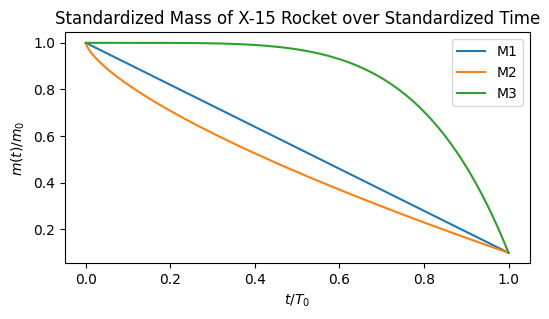

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(t, z1, label='M1')
plt.plot(t, z2, label='M2')
plt.plot(t, z3, label='M3')
plt.ylabel('$m(t)/m_0$')
plt.xlabel('$t/T_0$')
plt.title('Standardized Mass of X-15 Rocket over Standardized Time')
plt.legend()
plt.show()

In [ ]:
def dSdt(t,S, m0, vg, n, T0=40):
    x, v = S[0], S[1]
    # If still have fuel left (at t=1 all fuel is expelled)
    if t<1:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)
    # If out of fuel
    else:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(1,n))*v**2 *np.sign(v)
    # If accelerating downwards with negative speed while on the ground (can't go through ground)
    if (dvdt<0)*(dxdt<0)*(x<=0):
        dxdt=0
        dvdt=0
    return [dxdt,dvdt]

In [ ]:
n1, n2, n3 = 1, 0.7, 5
sol1 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n1, T0))
sol2 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n2, T0))
sol3 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n3, T0))

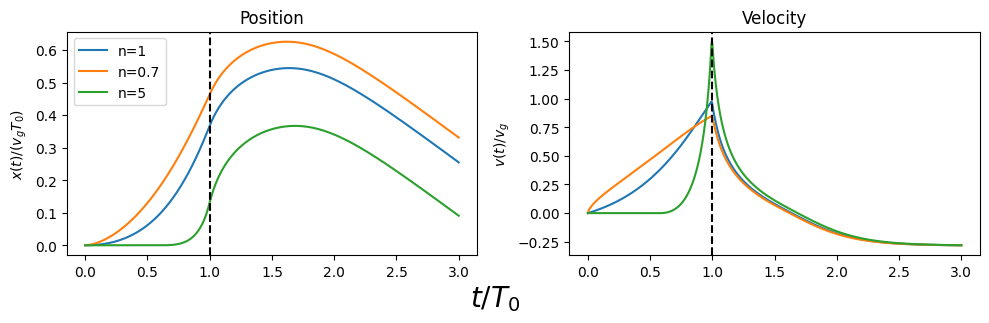

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
ax = axes[0]
ax.plot(sol1.t, sol1.y[0], label='n={}'.format(n1))
ax.plot(sol2.t, sol2.y[0], label='n={}'.format(n2))
ax.plot(sol3.t, sol3.y[0], label='n={}'.format(n3))
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$x(t)/(v_g T_0)$')
ax.set_title('Position')
ax.legend()
ax = axes[1]
ax.plot(sol1.t, sol1.y[1], label='n=1')
ax.plot(sol2.t, sol2.y[1], label='n=0.7')
ax.plot(sol3.t, sol3.y[1], label='n=5')
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$v(t)/v_g$')
ax.set_title('Velocity')
fig.text(0.5, -0.04, '$t/T_0$', ha='center', fontsize=20)
fig.tight_layout()

#Without Air Resistance Factor (b)


In [ ]:
T0 = 80 # 80 second launch
g = 9.81
vg = 1372 # fuel emitted at 1372m/s
M0 = 1.542e4 #15420kg rocket starting
b = 0.1 # coefficient of air friction
m0 = np.inf

In [ ]:
t, n = smp.symbols('t n')
z = 1-(9/10)*t**n
dzdt = smp.diff(z, t).simplify()
# Get numerical functions
z = smp.lambdify([t, n], z)
dzdt = smp.lambdify([t, n], dzdt)

In [ ]:
t = np.linspace(1e-4, 1, 1000)
z1 = z(t, 1)
z2 = z(t, 0.7)
z3 = z(t, 5)

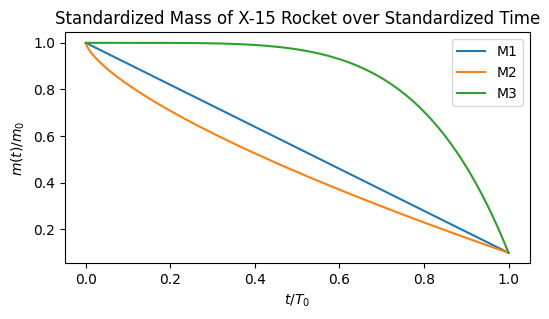

In [ ]:
plt.figure(figsize=(6,3))
plt.plot(t, z1, label='M1')
plt.plot(t, z2, label='M2')
plt.plot(t, z3, label='M3')
plt.ylabel('$m(t)/m_0$')
plt.xlabel('$t/T_0$')
plt.title('Standardized Mass of X-15 Rocket over Standardized Time')
plt.legend()
plt.show()

In [ ]:
def dSdt(t,S, m0, vg, n, T0=40):
    x, v = S[0], S[1]
    # If still have fuel left (at t=1 all fuel is expelled)
    if t<1:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)
    # If out of fuel
    else:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(1,n))*v**2 *np.sign(v)
    # If accelerating downwards with negative speed while on the ground (can't go through ground)
    if (dvdt<0)*(dxdt<0)*(x<=0):
        dxdt=0
        dvdt=0
    return [dxdt,dvdt]

In [ ]:
n1, n2, n3 = 1, 0.7, 5
sol1 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n1, T0))
sol2 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n2, T0))
sol3 = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, n3, T0))

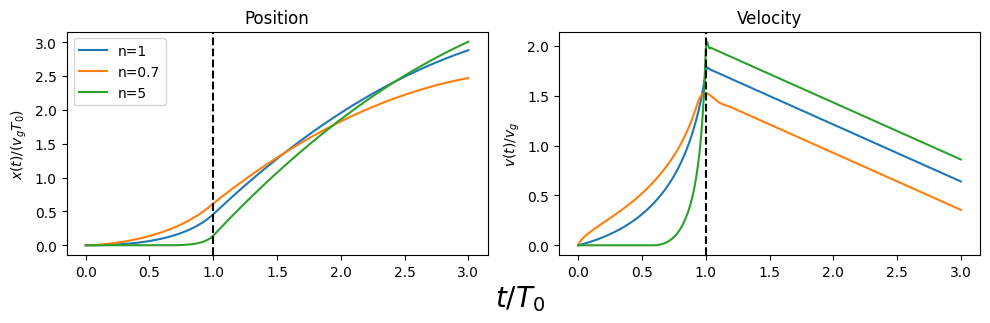

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
ax = axes[0]
ax.plot(sol1.t, sol1.y[0], label='n={}'.format(n1))
ax.plot(sol2.t, sol2.y[0], label='n={}'.format(n2))
ax.plot(sol3.t, sol3.y[0], label='n={}'.format(n3))
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$x(t)/(v_g T_0)$')
ax.set_title('Position')
ax.legend()
ax = axes[1]
ax.plot(sol1.t, sol1.y[1], label='n=1')
ax.plot(sol2.t, sol2.y[1], label='n=0.7')
ax.plot(sol3.t, sol3.y[1], label='n=5')
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$v(t)/v_g$')
ax.set_title('Velocity')
fig.text(0.525, -0.04, '$t/T_0$', ha='center', fontsize=20)
fig.tight_layout()